In [1]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools1 import MCSimulation

In [2]:
load_dotenv()

True

In [3]:
api_key = os.getenv("ALPACA_API_KEY")
secret_key = os.getenv("ALPACA_SECRET_KEY")

In [4]:
alpaca = tradeapi.REST(
    api_key,
    secret_key,
    api_version="v2")

In [5]:
start_date = pd.Timestamp('2018-06-15', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-06-15', tz='America/New_York').isoformat()

tickers = ["SHOP", "SSY", "FDX", "RIO", "HD", "SBUX", "SOFI", "SPY"]

timeframe = "1Day"

df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

df_portfolio

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2018-06-15 04:00:00+00:00,262.5100,264.9900,260.8434,264.5600,1363654,15540,263.539563,FDX
2018-06-18 04:00:00+00:00,263.0900,264.6500,261.5800,263.6700,1399778,16116,263.381021,FDX
2018-06-19 04:00:00+00:00,261.4300,261.5100,254.7500,258.3900,3160686,33506,258.404889,FDX
2018-06-20 04:00:00+00:00,257.3100,257.3100,251.0900,251.4300,3906190,45397,253.012027,FDX
2018-06-21 04:00:00+00:00,251.5000,251.8000,245.6480,246.7200,3671626,32548,247.837172,FDX
...,...,...,...,...,...,...,...,...
2023-06-09 04:00:00+00:00,0.9723,0.9850,0.9300,0.9310,8670,60,0.968447,SSY
2023-06-12 04:00:00+00:00,0.9310,0.9900,0.8800,0.8802,36532,111,0.920997,SSY
2023-06-13 04:00:00+00:00,0.8800,0.8800,0.8512,0.8749,33655,145,0.864170,SSY


In [6]:
SHOP = df_portfolio[df_portfolio['symbol']=='SHOP'].drop(['symbol', 'trade_count', 'vwap', 'high', 'low', 'volume', 'open'], axis=1)
SSY = df_portfolio[df_portfolio['symbol']=='SSY'].drop(['symbol', 'trade_count', 'vwap', 'high', 'low', 'volume', 'open'], axis=1)
FDX = df_portfolio[df_portfolio['symbol']=='FDX'].drop(['symbol', 'trade_count', 'vwap', 'high', 'low', 'volume', 'open'], axis=1)
RIO = df_portfolio[df_portfolio['symbol']=='RIO'].drop(['symbol', 'trade_count', 'vwap', 'high', 'low', 'volume', 'open'], axis=1)
HD = df_portfolio[df_portfolio['symbol']=='HD'].drop(['symbol', 'trade_count', 'vwap', 'high', 'low', 'volume', 'open'], axis=1)
SBUX = df_portfolio[df_portfolio['symbol']=='SBUX'].drop(['symbol', 'trade_count', 'vwap', 'high', 'low', 'volume', 'open'], axis=1)
SOFI = df_portfolio[df_portfolio['symbol']=='SOFI'].drop(['symbol', 'trade_count', 'vwap', 'high', 'low', 'volume', 'open'], axis=1)

SPY_df = df_portfolio[df_portfolio['symbol']=='SPY'].drop(['symbol', 'trade_count', 'vwap', 'high', 'low', 'volume', 'open'], axis=1)

stock_data_df = pd.concat([SHOP, SSY, FDX, RIO, HD, SBUX, SOFI], 
            axis=1, keys=["SHOP", "SSY", "FDX", "RIO", "HD", "SBUX", "SOFI"])

stock_data_df.index = stock_data_df.index.date

display(stock_data_df)
display(SPY_df)


,SHOP,SSY,FDX,RIO,HD,SBUX,SOFI
,close,close,close,close,close,close,close
2018-06-15,168.44,1.2800,264.56,56.79,200.54,57.11,NaN
2018-06-18,172.84,1.3900,263.67,57.06,200.69,57.22,NaN
2018-06-19,170.61,1.3200,258.39,54.95,199.21,57.43,NaN
2018-06-20,172.25,1.3800,251.43,55.07,199.08,52.22,NaN
2018-06-21,164.54,1.3200,246.72,54.72,200.31,50.62,NaN
...,...,...,...,...,...,...,...
2023-06-09,61.36,0.9310,223.76,64.57,297.35,97.94,8.18
2023-06-12,65.01,0.8802,224.55,63.74,300.86,98.48,9.16
2023-06-13,63.84,0.8749,228.87,65.60,300.08,99.26,9.54


,close
timestamp,
2018-06-15 04:00:00+00:00,277.03
2018-06-18 04:00:00+00:00,276.59
2018-06-19 04:00:00+00:00,275.48
2018-06-20 04:00:00+00:00,276.01
2018-06-21 04:00:00+00:00,274.24
...,...
2023-06-09 04:00:00+00:00,429.90
2023-06-12 04:00:00+00:00,433.80
2023-06-13 04:00:00+00:00,436.66


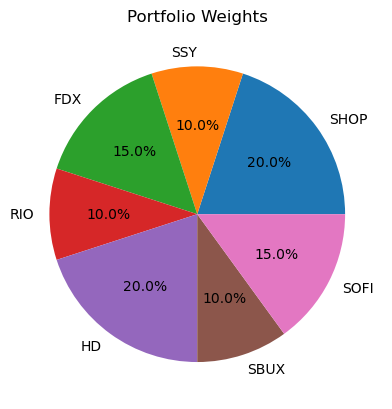

In [7]:
import matplotlib.pyplot as plt

# Define the desired weights for each stock in the portfolio
# The weights should add up to 1 (or 100%)
weights = {
    'SHOP': 0.2,   # 20% weight
    'SSY': 0.1,    # 10% weight
    'FDX': 0.15,   # 15% weight
    'RIO': 0.1,    # 10% weight
    'HD': 0.2,     # 20% weight
    'SBUX': 0.1,   # 10% weight
    'SOFI': 0.15   # 15% weight
}

#---------------------------------------------

# Extract the stock symbols and weights
symbols = list(weights.keys())
weights_values = list(weights.values())

# Create a pie chart
plt.pie(weights_values, labels=symbols, autopct='%1.1f%%')

# Add a title
plt.title('Portfolio Weights')

# Display the chart
plt.show()



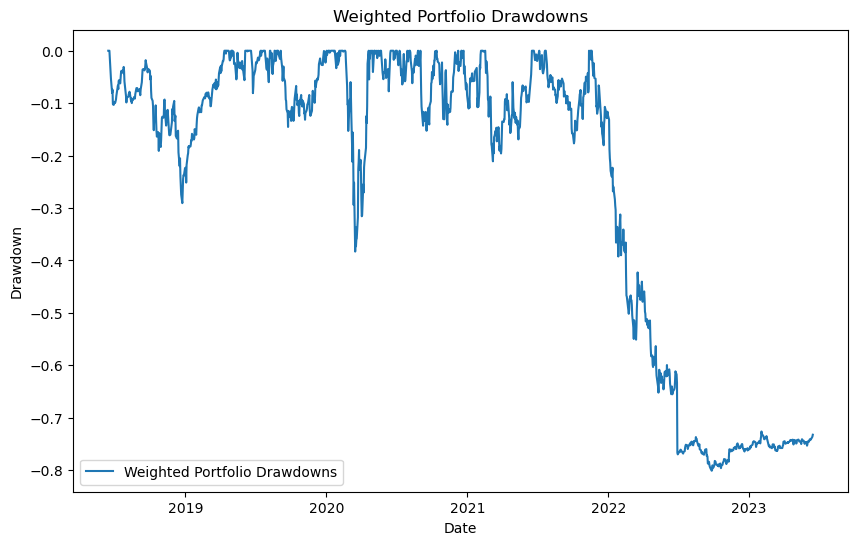

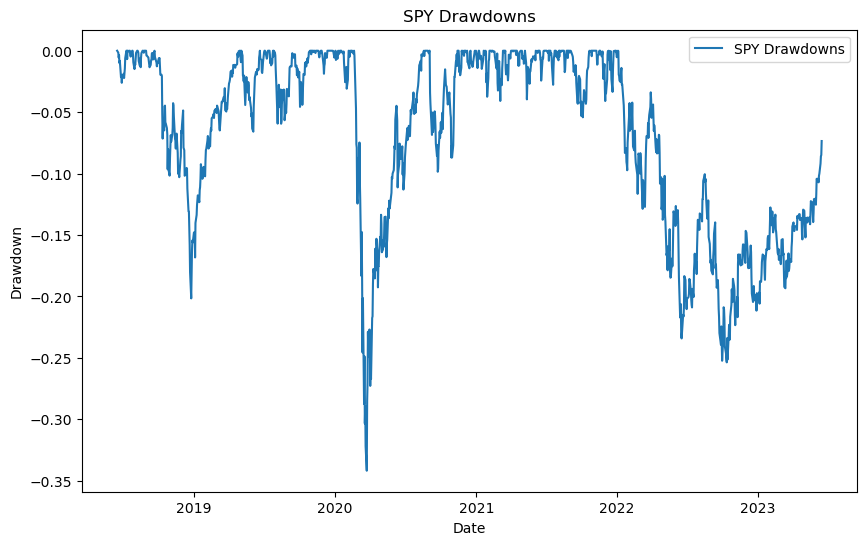

In [10]:
import matplotlib.pyplot as plt

 #Visualizing the drawdowns of your portfolio and the benchmark can help you understand the downside risk and recovery periods.
    
###investment_amount = 100000

# Calculate portfolio value for stock_data_df
portfolio_value = stock_data_df * 100000

# Calculate portfolio value for SPY_df
spy_portfolio_value = SPY_df * 100000

# Calculate the weighted portfolio value for stock_data_df
portfolio_value_weighted = (stock_data_df * weights_values).sum(axis=1) * 100000

# Calculate drawdowns for stock_data_df
stock_drawdowns = (portfolio_value_weighted / portfolio_value_weighted.cummax()) - 1

# Calculate drawdowns for SPY_df
spy_drawdowns = (spy_portfolio_value / spy_portfolio_value.cummax()) - 1

# Plot drawdowns for stock_data_df
plt.figure(figsize=(10, 6))
plt.plot(stock_drawdowns.index, stock_drawdowns.values, label='Weighted Portfolio Drawdowns')
plt.title('Weighted Portfolio Drawdowns')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.show()

# Plot drawdowns for SPY_df
plt.figure(figsize=(10, 6))
plt.plot(spy_drawdowns.index, spy_drawdowns.values, label='SPY Drawdowns')
plt.title('SPY Drawdowns')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.show()


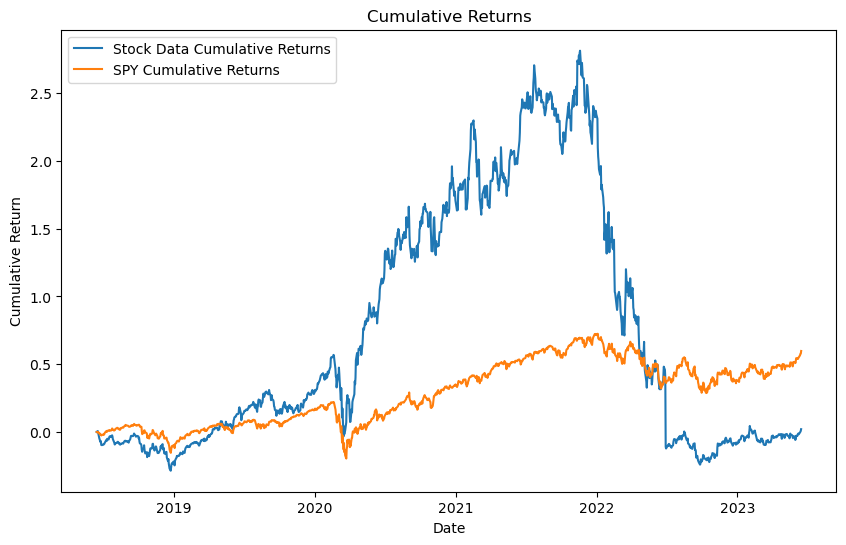

In [11]:
# Calculate cumulative returns for stock_data_df
stock_cumulative_returns = (portfolio_value_weighted / portfolio_value_weighted.iloc[0]) - 1

# Calculate cumulative returns for SPY_df
spy_cumulative_returns = (spy_portfolio_value / spy_portfolio_value.iloc[0]) - 1

# Plot cumulative returns for stock_data_df and SPY_df
plt.figure(figsize=(10, 6))
plt.plot(stock_cumulative_returns.index, stock_cumulative_returns.values, label='Stock Data Cumulative Returns')
plt.plot(spy_cumulative_returns.index, spy_cumulative_returns.values, label='SPY Cumulative Returns')
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()


In [13]:
!pip install quantstats


     ---------------------------------------- 45.5/45.5 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 63.2/63.2 kB 3.3 MB/s eta 0:00:00
     -------------------------------------- 112.2/112.2 kB 6.8 MB/s eta 0:00:00


DataFrames have empty data after reindexing.
